**Descenso de gradiente**
-
---

In [2]:
import numpy as np
import sympy as sp
from matplotlib import cm
import matplotlib.pyplot as plt

In [3]:
x, y, z = sp.symbols(['x','y', 'z'])

In [4]:
class f_2var():
    def __init__(self, string):
        self.string = str(string)
        x, y = sp.symbols('x y')
        self.expr = eval(self.string)
        self.nabla = sp.diff(self.expr, x) + sp.diff(self.expr, y)
    def func(self, x=None, y=None):
        return eval(self.string)
    
f1 = f_2var("x**2+y**2")
f1.expr

x**2 + y**2

#### **Gráfica 3D de $f1(x,y)$**

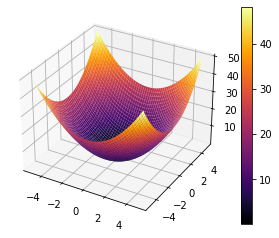

In [31]:
### Variable: Resolucion
res = 1000
### Variables: x, y, z
x1 = np.linspace(-5,5,num=res)
y1 = np.linspace(-5,5,num=res)
### Variables: XX, YY -> Generar una matriz coordinada entre x y y
XX1, YY1 = np.meshgrid(x1,y1)
### Variable: z -> Aplicando la funcion en z (usar los valores asignados por el método np.meshgrid)
z1 = f1.func(XX1,YY1)
### Gráfico
fig1, ax1 = plt.subplots(subplot_kw={'projection':'3d'})
surf = ax1.plot_surface(XX1,YY1,z1, cmap=cm.inferno)
fig1.colorbar(surf)
plt.show()

#### **Mapa de nivel de $f1(x,y)$**

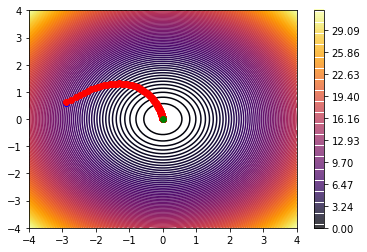

In [9]:
### Variable: Resolucion
res = 100
### Variables: x, y, z
x2 = np.linspace(-4,4,num=res)
y2 = np.linspace(-4,4,num=res)
### Variables: XX, YY -> Generar una matriz coordinada entre x y y
XX2, YY2 = np.meshgrid(x2,y2)
### Variable: z -> Aplicando la funcion en z (usar los valores asignados por el método np.meshgrid)
z2 = f1.func(XX2, YY2)
fig2, ax2 = plt.subplots()
level_map2 = np.linspace(np.min(z2),np.max(z2), num=res)
color_map2 = ax2.contour(x2,y2,z2, levels=level_map2, cmap=cm.inferno)
fig2.colorbar(color_map2)

p = np.random.rand(2) * 8 - 4 # generar dos valores aleatorios
plt.plot(p[0],p[1],'o', c='b')
lr = 0.01
h = 0.01
grad = np.zeros(2)
for i in range(10000):
  _p = np.copy(p)
  for idx, val in enumerate(p): 
    _p[idx] = _p[idx] + h
    grad[idx] = (f1.func(_p[0],_p[1]) - f1.func(p[0],p[1])) / (2*h)**1/2
  p = p - lr * grad
  if(i % 10 == 0):
    plt.plot(p[0],p[1],'o', c='r')

plt.plot(p[0],p[1],'o', c='g')
plt.show()


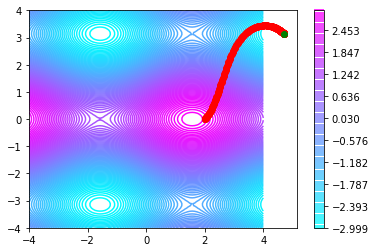

In [4]:
f2 = lambda x, y: np.sin(x) + 2*np.cos(y)

### Variable: Resolucion
res = 100
### Variables: x, y, z
x2 = np.linspace(-4,4,num=res)
y2 = np.linspace(-4,4,num=res)
### Variables: XX, YY -> Generar una matriz coordinada entre x y y
XX2, YY2 = np.meshgrid(x2,y2)
### Variable: z -> Aplicando la funcion en z (usar los valores asignados por el método np.meshgrid)
z2 = f2(XX2, YY2)
fig2, ax2 = plt.subplots()
level_map2 = np.linspace(np.min(z2),np.max(z2), num=res)
color_map2 = ax2.contour(x2,y2,z2, levels=level_map2, cmap=cm.cool)
fig2.colorbar(color_map2)

# p = np.random.rand(2) * 8 - 4 # generar dos valores aleatorios
p = [2,0]
plt.plot(p[0],p[1],'o', c='b')
lr = 0.01
h = 0.01
grad = np.zeros(2)
for i in range(10000):
  _p = np.copy(p)
  for idx, val in enumerate(p): 
    _p[idx] = _p[idx] + h
    grad[idx] = (f2(_p[0],_p[1]) - f2(p[0],p[1])) / (2*h)**1/2
  p = p - lr * grad
  if(i % 10 == 0):
    plt.plot(p[0],p[1],'o', c='r')

plt.plot(p[0],p[1],'o', c='g')
plt.show()

In [6]:
f2_expr = 'sin(x)+2*cos(y)'
f2_nabla = sp.diff(f2_expr,x) + sp.diff(f2_expr,y)
f2_nabla1 = lambda x, y: np.cos(x)
f2_nabla2 = lambda x, y: -2*np.sin(y)

h = [f2_nabla1(4,5),
f2_nabla2(4,5)]
h

[-0.6536436208636119, 1.917848549326277]

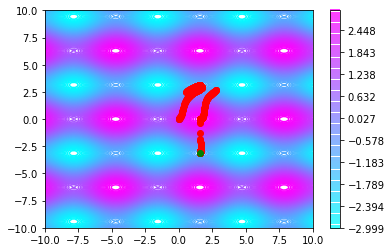

In [20]:
### Variable: Resolucion
res = 100
### Variables: x, y, z
x4 = np.linspace(-10,10,num=res)
y4 = np.linspace(-10,10,num=res)
### Variables: XX, YY -> Generar una matriz coordinada entre x y y
XX4, YY4 = np.meshgrid(x4,y4)
### Variable: z -> Aplicando la funcion en z (usar los valores asignados por el método np.meshgrid)
z4 = f2(XX4, YY4)
fig4, ax4 = plt.subplots()
level_map4 = np.linspace(np.min(z4),np.max(z4), num=res)
color_map4 = ax4.contour(x4,y4,z4, levels=level_map4, cmap=cm.cool)
fig4.colorbar(color_map4)

# p = np.random.rand(2) * 8 - 4 # generar dos valores aleatorios
p = [0,0]
# print(f2_nabla(_p[0],_p[1]))
plt.plot(p[0],p[1],'o', c='b')
lr = 0.01
# h = 0.01
grad = np.zeros(2)
for i in range(10000):
  _p = np.copy(p) + 0.01
  for idx, val in enumerate(p): 
    h = [f2_nabla1(_p[0],p[1]),
         f2_nabla2(_p[0],p[1])]
    _p[idx] = _p[idx] - h[idx]
    grad[idx] = (f2(_p[0],_p[1]) - f2(p[0],p[1])) / (2*h[0])**1/2
  p = p - lr * grad
  if(i % 10 == 0):
    plt.plot(p[0],p[1],'o', c='r')

plt.plot(p[0],p[1],'o', c='g')
plt.show()

In [105]:
p

array([-0.005, -0.005])

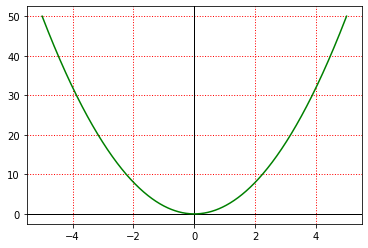

In [34]:
### Grafica x1 vs z1
fig, ax = plt.subplots()
ax.grid(color='r', linestyle='dotted', linewidth='1')
ax.axhline(y=0, color='black', linewidth='1')
ax.axvline(x=0, color='black', linewidth='1')
ax.plot(x1, f1.func(x1,y1), color='g')
plt.show()

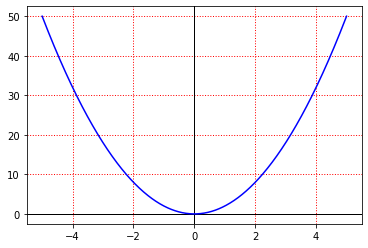

In [41]:
### Grafica y1 vs z1
fig, ax = plt.subplots()
ax.grid(color='r', linestyle='dotted', linewidth='1')
ax.axhline(y=0, color='black', linewidth='1')
ax.axvline(x=0, color='black', linewidth='1')
ax.plot(y1, f1.func(x1,y1), color='b')
plt.show()